# Penguins Body Mass Prediction using simple dataset

## Loading Necessary Libraries

In [3]:
import numpy as np
import pandas as pd

## Reading Dataset

In [5]:
df = pd.read_csv("penguins.csv")

In [6]:
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


## Null Values

In [9]:
df.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## Duplicate Values

In [11]:
df[df.duplicated()]

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [12]:
df.shape

(344, 9)

## Creating copy of Original Dataframe

In [14]:
dataset = df.copy()

In [15]:
dataset.shape

(344, 9)

In [16]:
dataset.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## Filling Numerical Null Values with Mean

In [18]:
dataset['bill_length_mm'] = dataset['bill_length_mm'].fillna(dataset['bill_length_mm'].mean())
dataset['bill_depth_mm'] = dataset['bill_depth_mm'].fillna(dataset['bill_depth_mm'].mean())
dataset['flipper_length_mm'] = dataset['flipper_length_mm'].fillna(dataset['flipper_length_mm'].mean())

## Filling Categorical Null Values with Mode

In [20]:
dataset['sex'].mode()

0    male
Name: sex, dtype: object

In [21]:
dataset['sex'] = dataset['sex'].fillna(dataset['sex'].mode()[0])

In [22]:
dataset.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          2
sex                  0
year                 0
dtype: int64

In [23]:
dataset.shape

(344, 9)

## Dropping NaN Values

In [25]:
dataset.dropna(inplace=True)

In [26]:
dataset.shape

(342, 9)

In [27]:
dataset.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 342 non-null    int64  
 1   species            342 non-null    object 
 2   island             342 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                342 non-null    object 
 8   year               342 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.7+ KB


## Preprocessing of Categorical Columns

In [30]:
dataset['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [31]:
dataset['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [32]:
dataset['sex'].value_counts()

sex
male      177
female    165
Name: count, dtype: int64

In [33]:
dataset['sex'] = np.where(dataset['sex'] == "female", 0, 1)

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 342 non-null    int64  
 1   species            342 non-null    object 
 2   island             342 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                342 non-null    int32  
 8   year               342 non-null    int64  
dtypes: float64(4), int32(1), int64(2), object(2)
memory usage: 25.4+ KB


## Encoding Categorical Columns with One Hot Encoder

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder

OneHotEncoder()

In [37]:
encoded = encoder.fit_transform(dataset[['species','island']]).toarray()

In [38]:
encoded

array([[1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.]])

In [39]:
df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [40]:
df.head()

,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0


In [41]:
df.shape

(342, 6)

In [42]:
dataset.shape

(342, 9)

## Concatenating Preprocessed Dataframe and Encoded Dataframe Together

In [44]:
new_df = pd.concat([dataset, df], axis=1)

In [45]:
new_df.shape

(344, 15)

In [46]:
new_df.drop(columns=['species','island'], inplace=True)

In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 0 to 271
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 342 non-null    float64
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                342 non-null    float64
 6   year               342 non-null    float64
 7   species_Adelie     342 non-null    float64
 8   species_Chinstrap  342 non-null    float64
 9   species_Gentoo     342 non-null    float64
 10  island_Biscoe      342 non-null    float64
 11  island_Dream       342 non-null    float64
 12  island_Torgersen   342 non-null    float64
dtypes: float64(13)
memory usage: 37.6 KB


In [48]:
new_df.tail()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
341,341.0,49.6,18.2,193.0,3775.0,1.0,2009.0,0.0,1.0,0.0,0.0,1.0,0.0
342,342.0,50.8,19.0,210.0,4100.0,1.0,2009.0,NaN,NaN,NaN,NaN,NaN,NaN
343,343.0,50.2,18.7,198.0,3775.0,0.0,2009.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0


In [49]:
new_df.isnull().sum().sum()

26

In [50]:
new_df.isnull().sum()

id                   2
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  2
year                 2
species_Adelie       2
species_Chinstrap    2
species_Gentoo       2
island_Biscoe        2
island_Dream         2
island_Torgersen     2
dtype: int64

In [51]:
new_df.shape

(344, 13)

In [52]:
new_df.dropna(inplace=True)

In [53]:
new_df.shape

(340, 13)

In [54]:
new_df.isnull().sum()

id                   0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
dtype: int64

In [55]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 341
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 340 non-null    float64
 1   bill_length_mm     340 non-null    float64
 2   bill_depth_mm      340 non-null    float64
 3   flipper_length_mm  340 non-null    float64
 4   body_mass_g        340 non-null    float64
 5   sex                340 non-null    float64
 6   year               340 non-null    float64
 7   species_Adelie     340 non-null    float64
 8   species_Chinstrap  340 non-null    float64
 9   species_Gentoo     340 non-null    float64
 10  island_Biscoe      340 non-null    float64
 11  island_Dream       340 non-null    float64
 12  island_Torgersen   340 non-null    float64
dtypes: float64(13)
memory usage: 37.2 KB


## Saving new dataframe file into csv file

In [57]:
new_df.to_csv('Penguin.csv', index=False)

In [58]:
dataframe = pd.read_csv('Penguin.csv')

In [59]:
dataframe.head()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,0.0,39.1,18.7,181.0,3750.0,1.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,39.5,17.4,186.0,3800.0,0.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,40.3,18.0,195.0,3250.0,0.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4.0,36.7,19.3,193.0,3450.0,0.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,39.3,20.6,190.0,3650.0,1.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0


In [60]:
dataframe.drop(columns=['id'],inplace=True)

## Visualization with respect to Co-Relation with every other features

<Axes: >

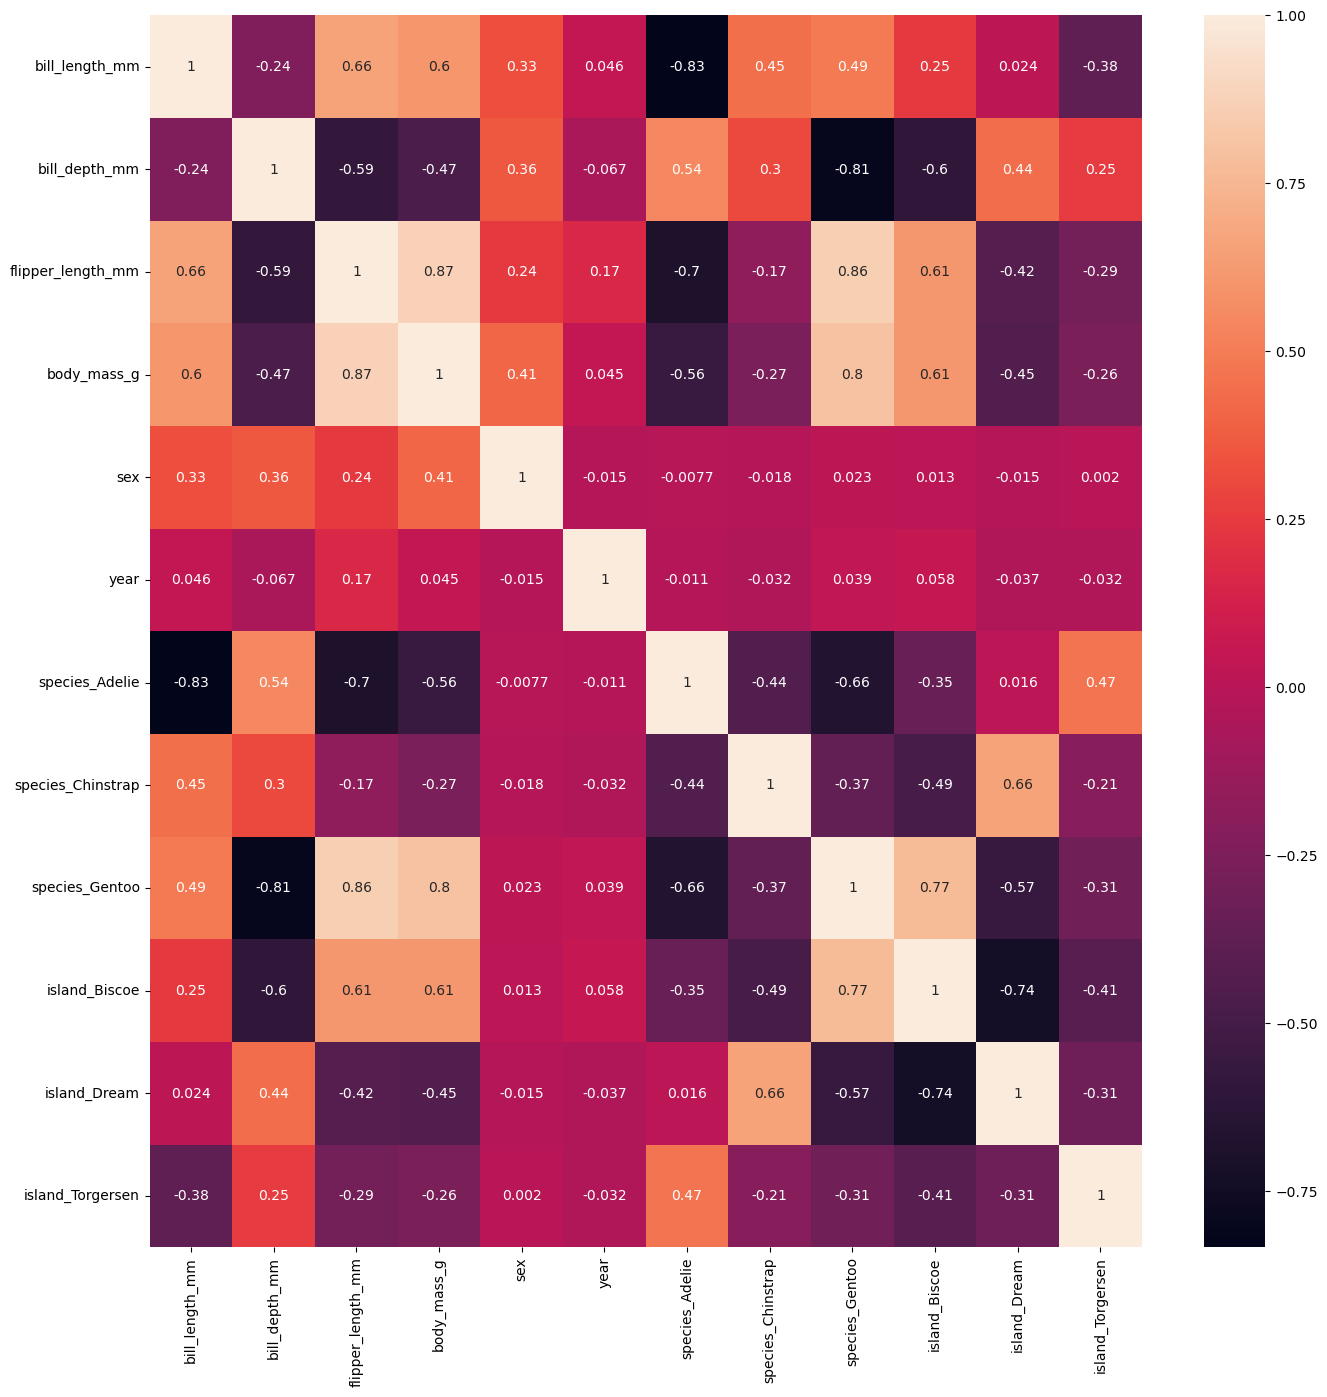

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
sns.heatmap(dataframe.corr(), annot=True)

## Preparing Data into Dependent and Independent Features

In [64]:
X = dataframe.drop(columns=['body_mass_g'], axis=1)

In [65]:
y = dataframe['body_mass_g']

In [66]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,1.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0
1,39.5,17.4,186.0,0.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,0.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0
3,36.7,19.3,193.0,0.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0
4,39.3,20.6,190.0,1.0,2007.0,1.0,0.0,0.0,0.0,0.0,1.0


In [67]:
y.head()

0    3750.0
1    3800.0
2    3250.0
3    3450.0
4    3650.0
Name: body_mass_g, dtype: float64

## Using train_test_split() for Model Training

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((272, 11), (272,), (68, 11), (68,))

## Scaling Training and Testing Data in specific range 

In [72]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar

StandardScaler()

In [73]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Effect of Data Scaling after using StandardScalar()

Text(0.5, 1.0, 'After Scaling')

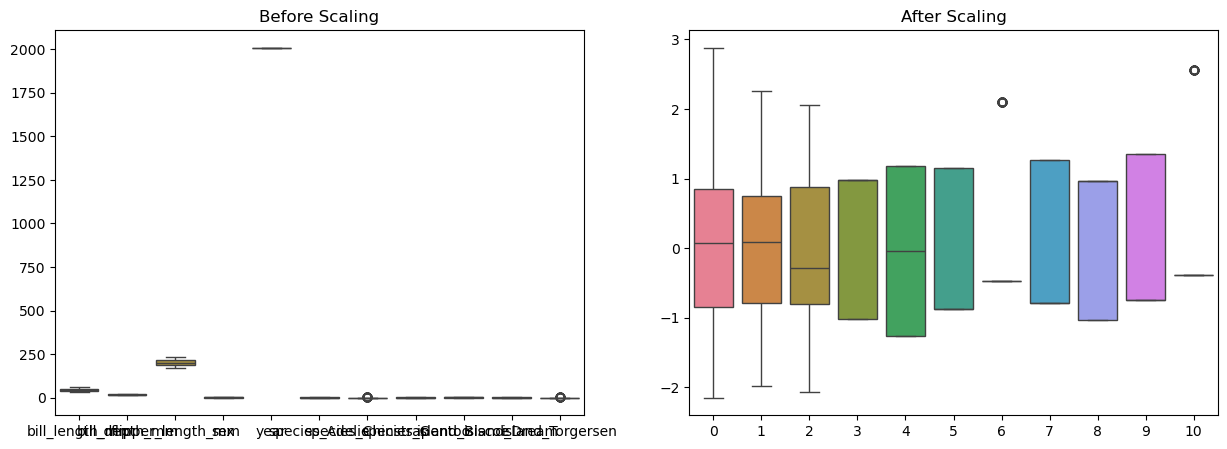

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After Scaling")

## Model Trining using Multiple Regression

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor

LinearRegression()

In [78]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [79]:
y_pred = regressor.predict(X_test_scaled)

## Checking Model Accuracy using R-Square

In [81]:
from sklearn.metrics import r2_score
print("R2 Score is ",r2_score(y_test,y_pred))

R2 Score is  0.8016646996204129


## Visualization if Predictions are Linear or not against TEST data

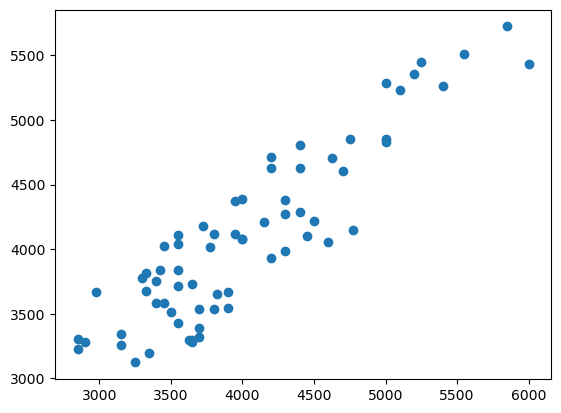

In [83]:
plt.scatter(y_test, y_pred)

## Conclusion
### Penguins Body mass is nearly correct classified against Original Test Data